In [37]:
import pandas as pd       
train = pd.read_csv("labeldata.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [38]:
print("The shape of our data:",train.shape,"\n")

The shape of our data: (25000, 3) 



In [39]:
print("Our column names are:",train.columns.values)
train

Our column names are: ['id' 'sentiment' 'review']


id  sentiment                                             review
0       "5814_8"          1  "With all this stuff going down at the moment ...
1       "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2       "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3       "3630_4"          0  "It must be assumed that those who praised thi...
4       "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
5       "8196_8"          1  "I dont know why people think this is such a b...
6       "7166_2"          0  "This movie could have been very good, but com...
7      "10633_1"          0  "I watched this video at a friend's house. I'm...
8        "319_1"          0  "A friend of mine bought this film for £1, and...
9      "8713_10"          1  "<br /><br />This movie is full of references....
10      "2486_3"          0  "What happens when an army of wetbacks, towelh...
11     "6811_10"          1  "Although I generally do not like remakes beli...
12     "11744_9"          1  "\"Mr. Harvey Lights a Candle\" is anchored by...
13      "7369_1"          0  "I had a feeling that after \"Submerged\", thi...
14     "12081_1"          0  "note to George Litman, and others: the Myster...
15      "3561_4"          0  "Stephen King adaptation (scripted by King him...
16      "4489_1"          0  "`The Matrix' was an exciting summer blockbust...
17      "3951_2"          0  "Ulli Lommel's 1980 film 'The Boogey Man' is n...
18     "3304_10"          1  "This movie is one among the very few Indian m...
19     "9352_10"          1  "Most people, especially young people, may not...
20      "3374_7"          1  "\"Soylent Green\" is one of the best and most...
21     "10782_7"          1  "Michael Stearns plays Mike, a sexually frustr...
22     "5414_10"          1  "This happy-go-luck 1939 military swashbuckler...
23     "10492_1"          0  "I would love to have that two hours of my lif...
24      "3350_3"          0  "The script for this movie was probably found ...
25      "6581_7"          1  "Looking for Quo Vadis at my local video store...
26      "2203_3"          0  "Note to all mad scientists everywhere: if you...
27       "689_1"          0  "What the ........... is this ? This must, wit...
28      "9152_1"          0  "Intrigued by the synopsis (every gay video th...
29      "6077_1"          0  "Would anyone really watch this RUBBISH if it ...
...          ...        ...                                                ...
24970   "9389_7"          1  "Red Rock West (1993)<br /><br />Nicolas Cage ...
24971   "9251_9"          1  "what can i say?, ms Erika Eleniak is my favor...
24972  "1422_10"          1  "The spoiler warning is for those people who w...
24973   "7415_2"          0  "What do you call a horror story without horro...
24974   "7492_7"          1  "Though not a horror film in the traditional s...
24975  "7689_10"          1  "This was what black society was like before t...
24976  "12370_4"          0  "They probably should have called this movie T...
24977   "5625_8"          1  "Attractive Marjorie(Farrah Fawcett)lives in f...
24978   "9397_9"          1  "Vaguely reminiscent of great 1940's westerns,...
24979   "5992_7"          1  "I admit I had no idea what to expect before v...
24980  "2488_10"          1  "To me, the final scene, in which Harris respo...
24981  "9627_10"          1  "This is by far the funniest short made by the...
24982   "3822_2"          0  "To be a Buster Keaton fan is to have your hea...
24983   "5983_4"          0  "I was one of those \"few Americans\" that gre...
24984   "8021_2"          0  "Visually disjointed and full of itself, the d...
24985   "3471_3"          0  "this movie had more holes than a piece of swi...
24986  "6034_10"          1  "Last November, I had a chance to see this fil...
24987   "1988_9"          1  "First off, I'd like to make a correction on a...
24988   "7623_9"          1  "While originally reluctant to jump

# Data Cleaning and Text Preprocessing¶

** First, we'll remove the HTML tags. For this purpose, we'll use the Beautiful Soup library.**

In [40]:
from bs4 import BeautifulSoup    

In [41]:
import nltk
#install nltk


In [42]:
from nltk.corpus import stopwords # Import the stop word list



In [43]:
import re

In [44]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [45]:
clean_review = review_to_words( train["review"][0] )
print (clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [46]:
num_reviews = train["review"].size    #to get the number of reviews
print(num_reviews)

25000


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [48]:
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length of the movie review list 
for i in range( 0, num_reviews ):
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ))                                                 

    # Call our function for each review, and add the result to the list of clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ) )

In [69]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors(tokens). The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)
train_data_features

Creating the bag of words...

(25000, 5000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
y = train['sentiment'].values
vocab = vectorizer.get_feature_names()
print (vocab)


['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 'ago', 'ag

In [72]:
y

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [73]:
X = train_data_features
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

** To print the count of each word**

In [74]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

366 content
83 contest
260 context
307 continue
128 continued
261 continues
212 continuity
130 contract
116 contrary
224 contrast
227 contrived
510 control
152 controversial
109 conventional
188 conversation
110 conversations
171 convey
197 convince
216 convinced
538 convincing
93 convincingly
121 convoluted
159 cook
971 cool
166 cooper
620 cop
90 copies
301 cops
575 copy
259 core
153 corner
258 corny
96 corporate
127 corpse
223 correct
82 correctly
133 corrupt
100 corruption
220 cost
233 costs
223 costume
418 costumes
7922 could
352 count
87 counter
136 countless
151 countries
935 country
103 countryside
1719 couple
93 couples
148 courage
2506 course
193 court
147 cousin
526 cover
212 covered
135 covers
212 cowboy
132 cox
106 crack
79 cracking
113 craft
167 crafted
122 craig
1039 crap
242 crappy
201 crash
118 craven
82 crawford
79 crazed
657 crazy
78 cream
612 create
542 created
245 creates
284 creating
129 creation
362 creative
85 creativity
92 creator
127 creators
340 creature
214 c

697 free
242 freedom
188 freeman
789 french
87 frequent
157 frequently
376 fresh
198 friday
1442 friend
193 friendly
1788 friends
283 friendship
195 frightening
595 front
125 frustrated
79 frustrating
103 frustration
284 fu
114 fulci
1779 full
83 fuller
426 fully
2694 fun
106 funeral
173 funnier
358 funniest
4288 funny
83 furious
106 furthermore
83 fury
900 future
120 futuristic
121 fx
90 gabriel
110 gadget
140 gag
262 gags
143 gain
1281 game
340 games
121 gandhi
421 gang
259 gangster
94 gangsters
459 garbage
103 garbo
109 garden
272 gary
195 gas
1216 gave
609 gay
361 gem
90 gender
277 gene
765 general
468 generally
85 generated
235 generation
80 generations
105 generic
124 generous
452 genius
1254 genre
113 genres
116 gentle
84 gentleman
256 genuine
251 genuinely
862 george
91 gerard
516 german
91 germans
227 germany
9310 get
3204 gets
1627 getting
484 ghost
181 ghosts
118 giallo
379 giant
131 gift
84 gifted
107 ginger
2853 girl
636 girlfriend
1211 girls
3376 give
1846 given
1576 give

83 meryl
641 mess
829 message
131 messages
91 messed
286 met
189 metal
81 metaphor
103 method
85 methods
184 mexican
185 mexico
199 mgm
1333 michael
172 michelle
108 mickey
319 mid
956 middle
178 midnight
2919 might
87 mighty
132 miike
281 mike
133 mild
174 mildly
115 mildred
123 mile
260 miles
462 military
79 milk
104 mill
169 miller
397 million
79 millionaire
149 millions
91 min
1995 mind
162 minded
154 mindless
185 minds
275 mine
213 mini
119 minimal
84 minimum
400 minor
789 minute
2952 minutes
94 miracle
168 mirror
143 miscast
100 miserable
124 miserably
92 misery
883 miss
565 missed
118 misses
594 missing
265 mission
426 mistake
108 mistaken
200 mistakes
88 mistress
125 mitchell
367 mix
287 mixed
103 mixture
83 miyazaki
83 mm
157 mob
240 model
105 models
929 modern
122 modesty
89 molly
367 mom
1112 moment
1663 moments
84 mon
2362 money
85 monk
132 monkey
98 monkeys
655 monster
277 monsters
103 montage
95 montana
148 month
272 months
432 mood
98 moody
296 moon
227 moore
366 moral
1

192 sarah
293 sat
128 satan
261 satire
106 satisfied
87 satisfy
216 satisfying
220 saturday
128 savage
1023 save
276 saved
143 saves
276 saving
3167 saw
5395 say
946 saying
1110 says
209 scale
219 scare
98 scarecrow
304 scared
189 scares
988 scary
183 scenario
5378 scene
407 scenery
5207 scenes
106 scheme
1659 school
658 sci
549 science
119 scientific
337 scientist
140 scientists
136 scooby
97 scope
1030 score
91 scores
84 scotland
584 scott
93 scottish
268 scream
271 screaming
117 screams
2493 screen
173 screening
695 screenplay
161 screenwriter
3026 script
118 scripted
147 scripts
93 scrooge
264 sea
156 seagal
263 sean
298 search
147 searching
773 season
237 seasons
232 seat
1962 second
104 secondly
348 seconds
611 secret
138 secretary
93 secretly
113 secrets
206 section
194 security
11475 see
101 seed
2099 seeing
179 seek
161 seeking
86 seeks
2175 seem
1363 seemed
347 seemingly
3618 seems
6679 seen
537 sees
255 segment
139 segments
80 seldom
1185 self
112 selfish
232 sell
99 sellers

439 walking
213 walks
367 wall
116 wallace
133 walls
86 walsh
221 walter
90 wandering
81 wang
158 wanna
117 wannabe
3703 want
1352 wanted
298 wanting
1287 wants
2051 war
126 ward
227 warm
109 warming
86 warmth
153 warn
174 warned
177 warner
314 warning
117 warren
120 warrior
82 warriors
332 wars
272 washington
1457 waste
560 wasted
150 wasting
6973 watch
307 watchable
2236 watched
122 watches
4603 watching
547 water
108 waters
85 watson
173 wave
93 waves
8026 way
236 wayne
804 ways
761 weak
99 weakest
109 wealth
153 wealthy
148 weapon
168 weapons
186 wear
326 wearing
166 wears
114 web
112 website
304 wedding
460 week
207 weekend
202 weeks
139 weight
663 weird
214 welcome
10662 well
251 welles
121 wells
98 wendy
1463 went
272 werewolf
121 wes
476 west
600 western
164 westerns
96 wet
116 whale
732 whatever
85 whats
319 whatsoever
270 whenever
149 whereas
856 whether
280 whilst
1492 white
202 whoever
3078 whole
82 wholly
84 whoopi
986 whose
118 wicked
281 wide
87 widely
155 widmark
105 wi

In [75]:
print( "Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [76]:
from sklearn.cross_validation import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((20000, 5000), (5000, 5000), (5000,), (20000,))

In [79]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [80]:
model_M = MultinomialNB()
model_G = GaussianNB()

In [81]:
model_M.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
model_G.fit(x_train,y_train)
y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
cm_M = confusion_matrix(y_test,y_pred_M)
cm_G = confusion_matrix(y_test,y_pred_G)

cr_M = classification_report(y_test,y_pred_M)
cr_G = classification_report(y_test,y_pred_G)


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

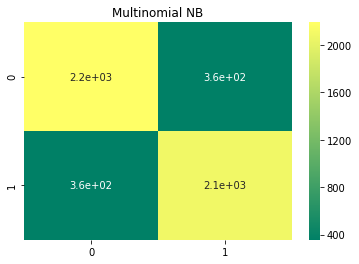

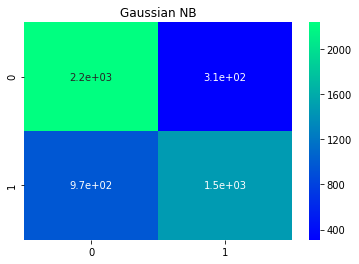

             precision    recall  f1-score   support

          0       0.86      0.86      0.86      2548
          1       0.85      0.85      0.85      2452

avg / total       0.86      0.86      0.86      5000

             precision    recall  f1-score   support

          0       0.70      0.88      0.78      2548
          1       0.83      0.60      0.70      2452

avg / total       0.76      0.74      0.74      5000



In [86]:
sns.heatmap(cm_M,annot = True, cmap='summer')
plt.title('Multinomial NB')
plt.show()
sns.heatmap(cm_G,annot= True, cmap='winter')
plt.title('Gaussian NB')
plt.show()
print(cr_M)
print('='*50)
print(cr_G)

In [87]:
test = clean_review
test

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [88]:
review = clean_review
    # 2. Remove non-letters        
review = re.sub("[^a-zA-Z]", " ", review) 
    #
    # 3. Convert to lower case, split into individual words
review = review.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
review = [w for w in review if not w in stops]   
    # 
    # 6. Join the words back into one string separated by space, 
    # and return the result.
review = " ".join( review)
review


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [89]:
test_arr = vectorizer.transform([review])

In [90]:
test_arr

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 146 stored elements in Compressed Sparse Row format>

In [91]:
model_M.predict(test_arr)

array([0], dtype=int64)